In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
!unzip -q '/content/dataset.zip'  && echo "Unzip completed"

Unzip completed


In [ ]:
dataset_path = '/content/dataset'
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation for training 
# Used techniques to not generate images already present in dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1],
    channel_shift_range=10.0,
    fill_mode='nearest'
)

# validation
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

class_names = list(train_generator.class_indices.keys())
num_classes = len(class_names)
print("Your animal classes:", class_names)

Found 1561 images belonging to 15 classes.
Found 383 images belonging to 15 classes.
Your animal classes: ['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']


In [ ]:
# CNN model (from scratch)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # 15 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     9,437,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,829,711 (37.50 MB)

 Trainable params: 9,829,711 (37.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCHS = 30

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 38s 602ms/step - accuracy: 0.0730 - loss: 2.7521 - val_accuracy: 0.1175 - val_loss: 2.5979
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 467ms/step - accuracy: 0.1559 - loss: 2.5720 - val_accuracy: 0.1932 - val_loss: 2.4790
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 463ms/step - accuracy: 0.2039 - loss: 2.4747 - val_accuracy: 0.3029 - val_loss: 2.2595
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 469ms/step - accuracy: 0.2361 - loss: 2.3201 - val_accuracy: 0.2872 - val_loss: 2.1715
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 448ms/step - accuracy: 0.2583 - loss: 2.2270 - val_accuracy: 0.2846 - val_loss: 2.2497
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 464ms/step - accuracy: 0.3026 - loss: 2.1778 - val_accuracy: 0.3029 - val_loss: 2.1071
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 460ms/step - accuracy: 0.3204 - loss: 2.0540 - val_accuracy: 0.3838 - val_loss: 2.0103
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 463ms/step - accuracy: 0.3546 - loss: 1.9570 - val_accu

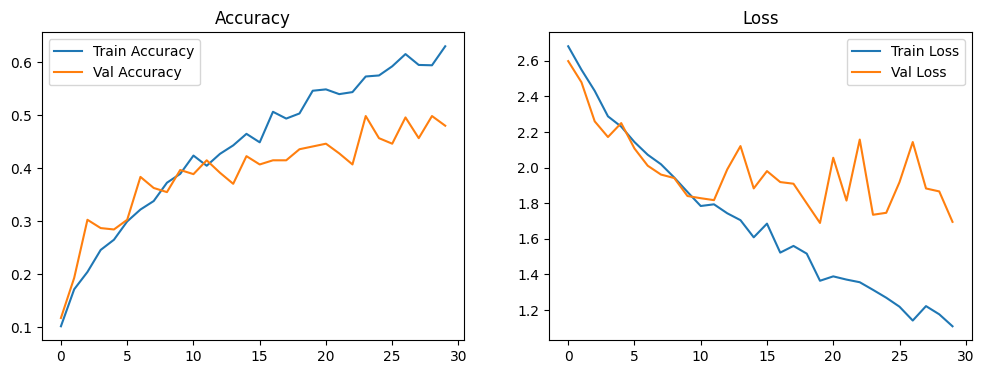

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()